# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
from utils import get_dataset

In [3]:
dataset = get_dataset("/exercise/Object_Detection_Urban_Environment/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/exercise/Object_Detection_Urban_Environment/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/exercise/Object_Detection_Urban_Environment/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
import os
from utils import get_dataset
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline

In [28]:
def display_instances(tfrecord):
    '''This function shows an image from the tfrecord with its
       corresponding ground truth bounding boxes and labels.
    '''
    # Variables
    name    = tfrecord['filename']
    img     = tfrecord['image'].numpy()
    img_shape = img.shape
    bboxes   = tfrecord['groundtruth_boxes'].numpy()
    classes = tfrecord['groundtruth_classes'].numpy()
    
    #Display the information of the tfrecord
    print('#########################################TFrecord Information#########################################')
    print('Name of the TFrecord: {}'.format(tfrecord['filename']))
    print('The shape of the image is: {}'.format(img_shape))
    print('The are {} boxes in the image:'.format(len(bboxes)))
    print('The are {} objects in the image:'.format(len(classes)))
    
    _, ax = plt.subplots(1,figsize=(20, 10))
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    
    for cl, bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb
        y1 = y1*img_shape[0]
        x1 = x1*img_shape[1]
        y2 = y2*img_shape[0]
        x2 = x2*img_shape[1]
        rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
        ax.add_patch(rec)
        
    # Plot the image with its corresponding bounding boxes
    imgplot = plt.imshow(img)
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11799592541704458019_9828_750_9848_750_with_camera_labels_81.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 33 boxes in the image:
The are 33 objects in the image:


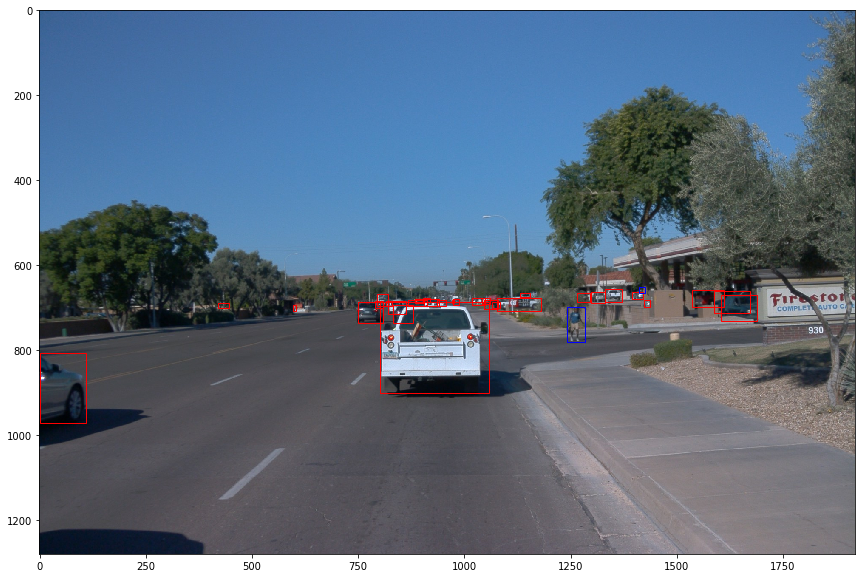

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11388947676680954806_5427_320_5447_320_with_camera_labels_6.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 37 boxes in the image:
The are 37 objects in the image:


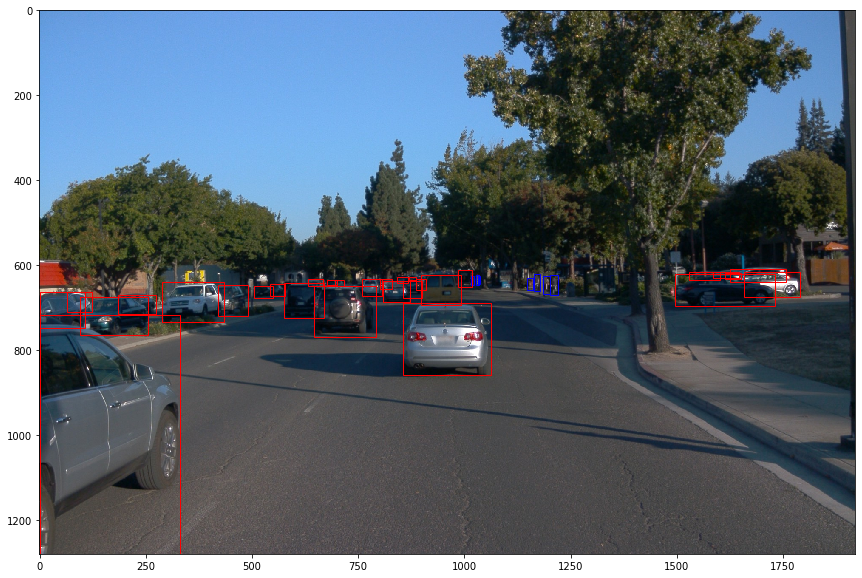

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10391312872392849784_4099_400_4119_400_with_camera_labels_4.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 1 boxes in the image:
The are 1 objects in the image:


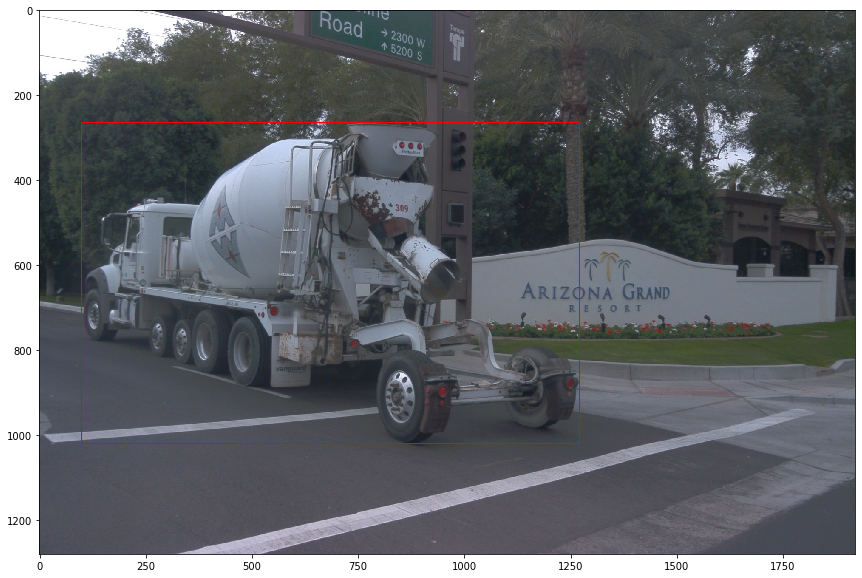

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11004685739714500220_2300_000_2320_000_with_camera_labels_69.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 2 boxes in the image:
The are 2 objects in the image:


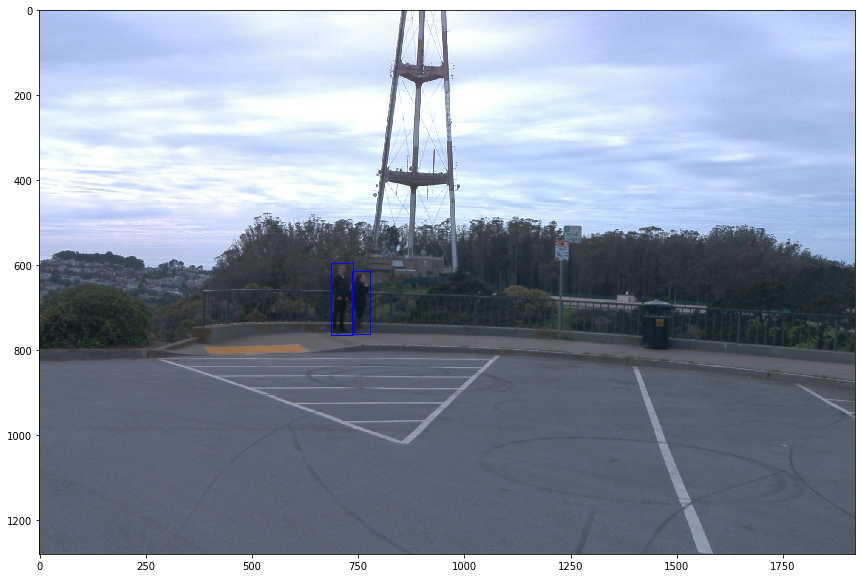

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11388947676680954806_5427_320_5447_320_with_camera_labels_13.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 38 boxes in the image:
The are 38 objects in the image:


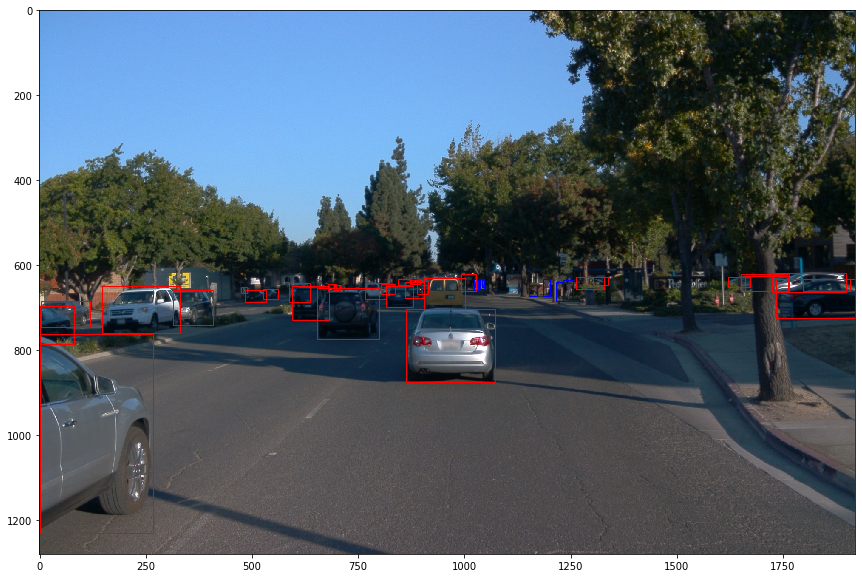

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-12174529769287588121_3848_440_3868_440_with_camera_labels_24.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 37 boxes in the image:
The are 37 objects in the image:


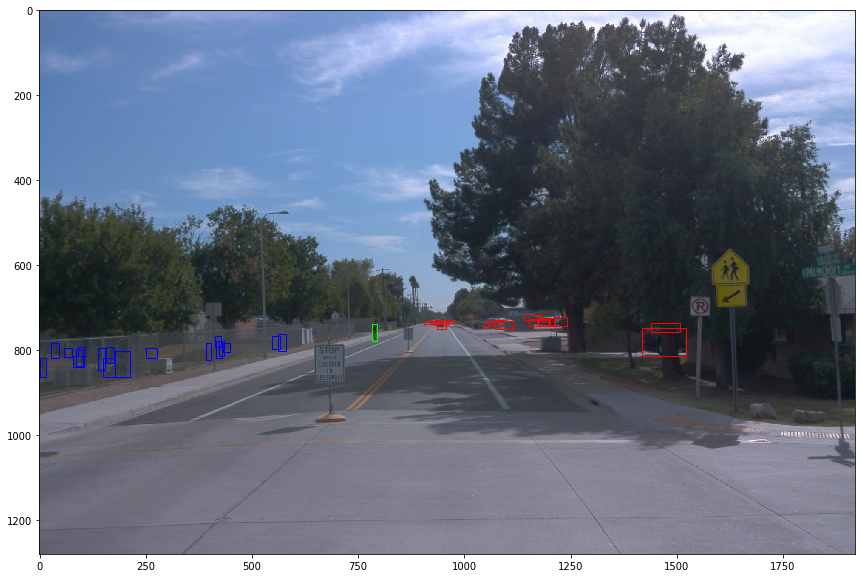

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11343624116265195592_5910_530_5930_530_with_camera_labels_59.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 27 boxes in the image:
The are 27 objects in the image:


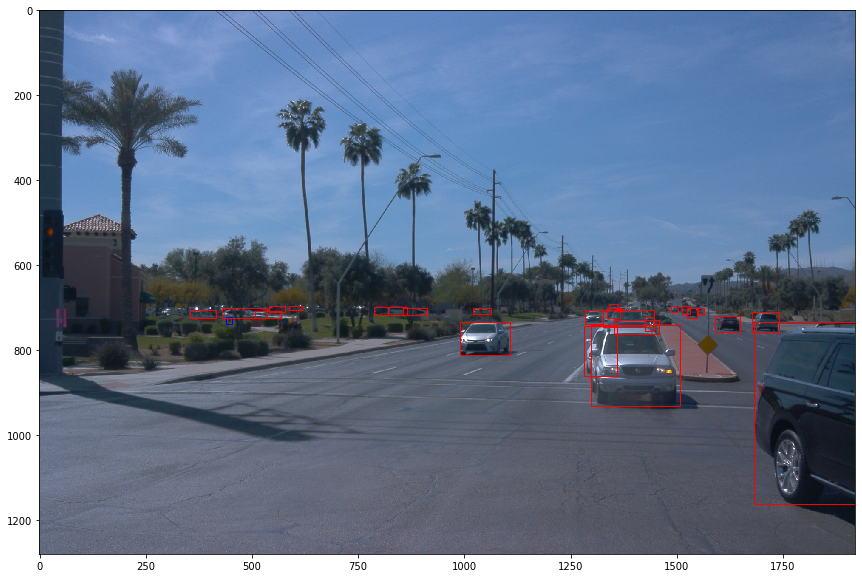

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-1208303279778032257_1360_000_1380_000_with_camera_labels_15.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 14 boxes in the image:
The are 14 objects in the image:


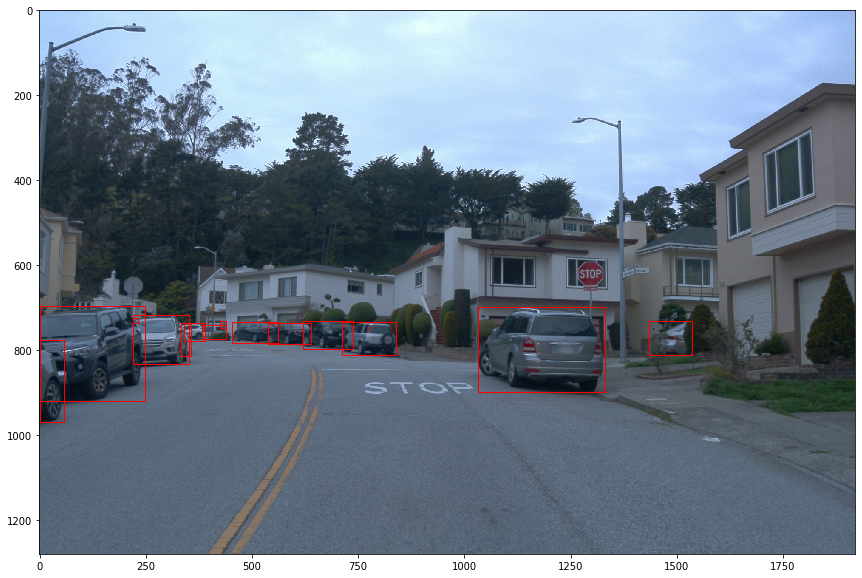

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10391312872392849784_4099_400_4119_400_with_camera_labels_76.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 13 boxes in the image:
The are 13 objects in the image:


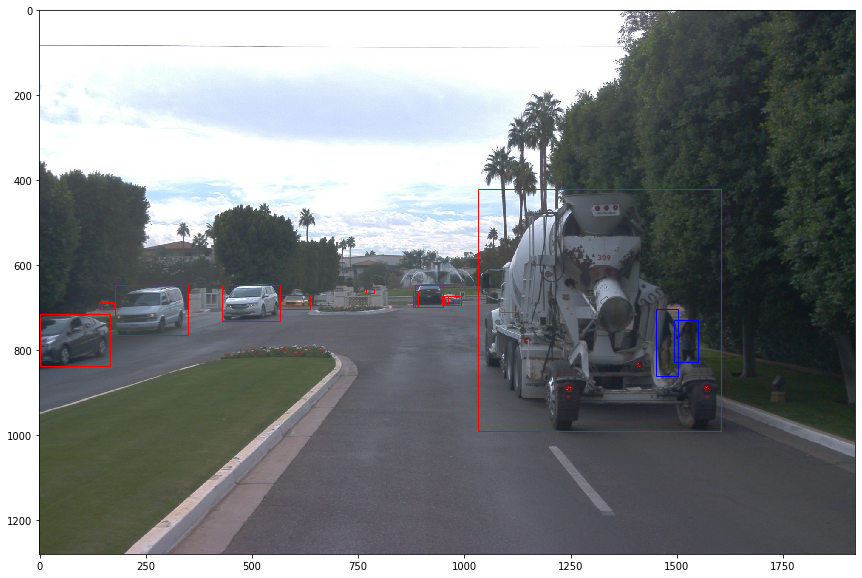

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11971497357570544465_1200_000_1220_000_with_camera_labels_9.tfrecord'
The shape of the image is: (1280, 1920, 3)
The are 38 boxes in the image:
The are 38 objects in the image:


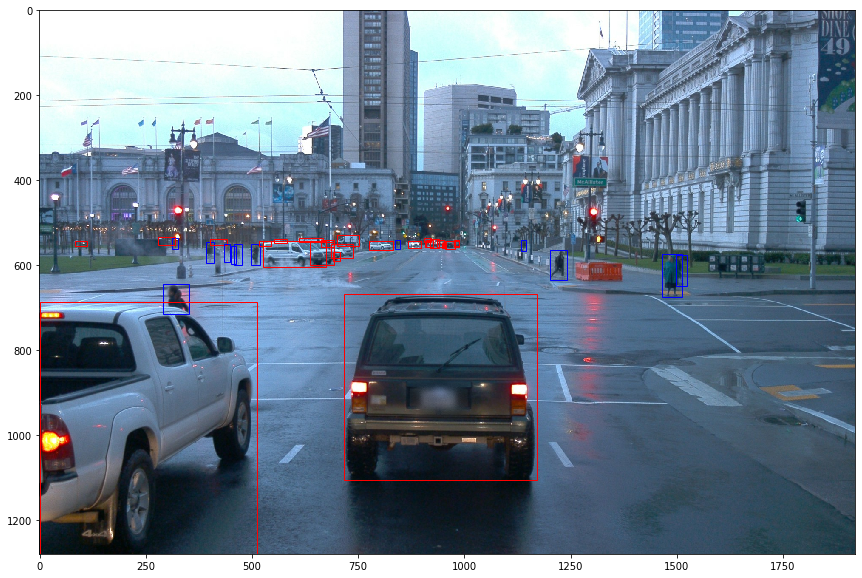

In [31]:
## STUDENT SOLUTION HERE
dataset.shuffle(100)

for batches in dataset.take(10):
    display_instances(batches)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [32]:
for batches in dataset.take(2):
    print(batches)

{'image': <tf.Tensor: shape=(1280, 1920, 3), dtype=uint8, numpy=
array([[[ 64, 104, 156],
        [ 66, 106, 158],
        [ 68, 108, 160],
        ...,
        [ 69, 120, 173],
        [ 69, 120, 173],
        [ 68, 119, 172]],

       [[ 65, 105, 157],
        [ 66, 106, 158],
        [ 68, 108, 160],
        ...,
        [ 68, 119, 172],
        [ 67, 118, 171],
        [ 67, 118, 171]],

       [[ 66, 106, 158],
        [ 67, 107, 159],
        [ 67, 107, 159],
        ...,
        [ 68, 119, 174],
        [ 67, 118, 173],
        [ 67, 118, 173]],

       ...,

       [[ 72,  72,  84],
        [ 74,  74,  86],
        [ 74,  74,  86],
        ...,
        [105, 113, 126],
        [104, 112, 125],
        [104, 112, 125]],

       [[ 72,  72,  84],
        [ 74,  74,  86],
        [ 74,  74,  86],
        ...,
        [105, 113, 126],
        [105, 113, 126],
        [104, 112, 125]],

       [[ 73,  73,  85],
        [ 74,  74,  86],
        [ 74,  74,  86],
        ...,
        [

In [33]:
dir(dataset.take(1))

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_as_variant_tensor',
 '_checkpoint_dependencies',
 '_consumers',
 '_dataset',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_make_

In [43]:
#dataset.take(1).iter().output_classes()
for batches in dataset.take(1):
    print(batches['groundtruth_area'])

tf.Tensor([], shape=(0,), dtype=float32)
